<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 4 October, 23:59)</span>. It is expected that you will pose a questions about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2021 that we've been using). 

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2020 (Session 75). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1970-2020.tar.gz</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook. 

Notice that the 76th session of the UN General Assembly - where the 2021 debates will happen - will occur in 14-30 September 2021, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/76/meetings/). 

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that date [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the correspondig CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [3]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./large_data/TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename))
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech

,Session,Year,ISO-alpha3 Code,Speech
0,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
1,25,1970,MEX,"33.\t Mr. President, I take great pleasure in..."
2,25,1970,COG,122.\t I cannot begin my intervention without...
3,25,1970,DZA,1. The delegation of Algeria is very pleased ...
4,25,1970,LKA,"176.\t Mr. President, the delegation of Ceylon..."
...,...,...,...,...
8476,75,2020,HRV,"Mr President, Excellencies\nAll protocol obser..."
8477,75,2020,GAB,"Mr. President, Majesties,\nLadies and Gentleme..."
8478,75,2020,MCO,"Mr. President of the General Assembly,\nMr. Se..."
8479,75,2020,AND,"Mr. President,\nMr. Secretary General,\nYour E..."


When you download file 'UNSD — Methodology.csv' ([link](https://unstats.un.org/unsd/methodology/m49/overview/)) and try to load it, you find an error: some rows in the file have 17 elements, others have 16. You start to notice why data cleaning and pre-processing are relevant (and time consuming).

In [4]:
df_codes = pd.read_csv('./data/UNSD - Methodology.csv')
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN,Developing
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing


Notice that in line 67 of the CSV file we have:

001,World,019,Americas,419,Latin America and the Caribbean,029,Caribbean,Bonaire, Sint Eustatius and Saba,535,BQ,BES,,,x,Developing

**There is an extra comma in the Country name "Bonaire, Sint Eustatius and Saba", which, given the comma-separated format we are using, leads the country name to be divided in an extra token. Remove that comma or substitue by hyphen.**

**Q: Can you figure out the similar problem and solve lines 126 and 127?**

**Q: Can you create a merged DataFrame — merge between df_codes and df_speech according to ISO-alpha3 and composed of columns \["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Developed / Developing Countries", "Session", "Year", "Speech"\]? It would be convinient to have index as (Year, 'ISO-alpha3 Code')**

In [6]:
df_un_merged = pd.merge(df_codes, df_speech, on="ISO-alpha3 Code")[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Developed / Developing Countries", "Session", "Year", "Speech"]]

df_un_merged.set_index(['Year', 'ISO-alpha3 Code'], inplace=True)

We are now going to use NLTK

Please run the cell below to import NLTK and download the needed resources

In [7]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/nnikolov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nnikolov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nnikolov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nnikolov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Let us now see some examples of word analysis with NLTK:

Which were the most frequent words used in the Austrian Speech in 1970?

In [8]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# load text of Austria in 1970
text = df_un_merged.loc[1970,'AUT']["Speech"]

# tokenize words
words = word_tokenize(text)

# compute word frequency
freq = FreqDist(words)

# show 30 most frequent words
freq.most_common(30)

[('the', 383),
 ('of', 268),
 (',', 180),
 ('to', 163),
 ('.', 160),
 ('and', 116),
 ('in', 104),
 ('a', 91),
 ('that', 55),
 ('by', 39),
 ('this', 39),
 ('for', 39),
 ('which', 38),
 ('be', 35),
 ('on', 34),
 ('is', 32),
 ('United', 30),
 ('The', 29),
 ('Nations', 28),
 ('as', 27),
 ('Austria', 26),
 ('our', 23),
 ('with', 23),
 ('I', 22),
 ('international', 22),
 ('it', 22),
 ('has', 21),
 ('States', 21),
 ('all', 20),
 ('its', 20)]

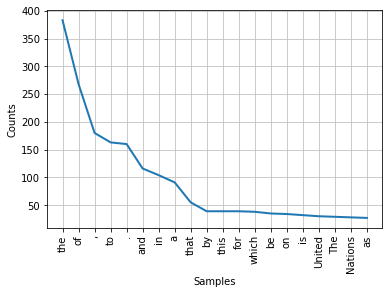

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# plot the histogram with the top most used words
freq.plot(20)

Notice that the most frequent words are not that informative about the Austrian speech (the, of, to...). These words are often called *stop-words*. These words are generally filtered out before processing text (natural language). These are actually some of the most common words in any language (articles, prepositions, pronouns, conjunctions, etc) but do not add much information to the text. Let's now use NLTK to filter those words

In [10]:
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

def process_sequentially(words, fns):
    result = words
    
    for fn in fns:
        result = fn(result)
        
    return result
    

def simple_preprocess(words):
    preprocessed = []
    for w in words:
        w_processed = w.lower()
        w_processed = re.sub(r"[\n\t\s]*", "", w_processed)
        w_processed = w_processed.strip()

        if w_processed:
            preprocessed.append(w_processed)
    
    return preprocessed


def filter_out_words(words):
    sw = stopwords.words("english")
    filtered = []
    for w in words:
        if (w in sw) or (not w.isalpha()):
            continue
        filtered.append(w)
    
    return filtered


def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for word in words:
        lemmatized.append(lemmatizer.lemmatize(word))
    
    return lemmatized


def stem(words):
    stemmer = PorterStemmer()
    stemmed = []
    for word in words:
        stemmed.append(stemmer.stem(word))
        
    return stemmed


def preprocess(words):
    return process_sequentially(words, [
        simple_preprocess,
        filter_out_words,
        lemmatize,
#         stem
    ])

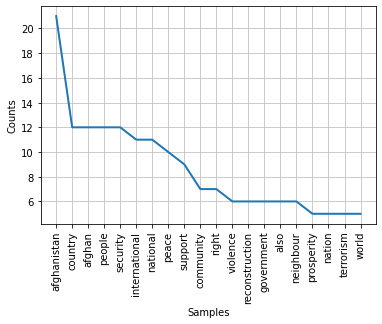

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
text = df_un_merged.loc[2002,"AFG"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

**Q: Can you change the method preprocess to put all words in lower case, remove punctuation and remove non-informative words (e.g., United Nations)?**

Tip: the method isalpha() might be useful

A regular expression is a sequence of characters that specifies a pattern. Usually, such patterns are used by to find, match, replace sub-strings within a document. Regular expressions have a particular syntax and are often useful to clean and pre-process textual data. Here one example where the regular expression 'afg.\*' is used to match any word that starts with afg and is followed by any character. 

In [12]:
# Regular expression example
s = set({})
import re
for w in words:
    if re.match('afg.*', w):
        s.add(w)
print(s)

{'afghanistan', 'afghan'}


Another useful usage of NLTK is performing sentiment analysis.

Sentiment analysis can be seen as the process of automatically classifying text into positive or negative sentiment categories. With NLTK, you can employ these algorithms without effort. This was also called opinion mining.

In the political field, sentiment analysis is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level or to derive the opinion or attitude of a speaker.

NLTK implements VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis. VADER uses a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

NLTK implements VADER through the module SentimentIntensityAnalyzer. Below an example of application (with natural limitations as VADER is specifically attuned to sentiments expressed in **social media**):

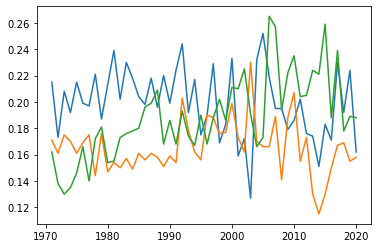

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

vecUSA = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"USA"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecRUS = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"RUS"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecCHN = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"CHN"]["Speech"])['pos'] for i in np.arange(1971, 2021)]

fig, ax = plt.subplots()
ax.plot(np.arange(1971, 2021), vecUSA)
ax.plot(np.arange(1971, 2021), vecRUS)
ax.plot(np.arange(1971, 2021), vecCHN)
plt.show()

Notice that depending on how you're going to use the UN Debates corpus, you might need to perform some data cleaning. For example, try to execute the following code:

<code>df_un_merged.loc[1970,"YUG"]</code> (too many NaN)

<code>df_un_merged.loc[2020,"POR"]</code> (too many NaN)

<code>df_un_merged.loc[2020,"PRT"]</code> (error)

**Can you identify and solve the problems below?**

In [15]:
df_un_merged.loc[1970,"YUG"]

KeyError: 'YUG'

In [16]:
df_un_merged.loc[2020]

,Country or Area,Region Name,Sub-region Name,Developed / Developing Countries,Session,Speech
ISO-alpha3 Code,,,,,,
DZA,Algeria,Africa,Northern Africa,Developing,75,"In the name of God, the Merciful, the Compassi..."
EGY,Egypt,Africa,Northern Africa,Developing,75,"Mr President,\nAllow me at the outset to exten..."
LBY,Libya,Africa,Northern Africa,Developing,75,"Mr. President,\nYour Excellences and Honours,\..."
MAR,Morocco,Africa,Northern Africa,Developing,75,"In the name of God, the most gracious, the mos..."
SDN,Sudan,Africa,Northern Africa,Developing,75,"In the name of God, the most merciful,\nYour M..."
...,...,...,...,...,...,...
NRU,Nauru,Oceania,Micronesia,Developing,75,"Mr. President,\nIt is an honour to participate..."
PLW,Palau,Oceania,Micronesia,Developing,75,"Mr. President, Mr. Secretary-General, Excellen..."
WSM,Samoa,Oceania,Polynesia,Developing,75,"Mr. President,\nDistinguished delegates,\nLadi..."


In [17]:
df_un_merged.loc[2019,"PRT"]

Country or Area                                                              Portugal
Region Name                                                                    Europe
Sub-region Name                                                       Southern Europe
Developed / Developing Countries                                            Developed
Session                                                                            74
Speech                              What a happy coincidence it is to follow, at t...
Name: (2019, PRT), dtype: object

In [19]:
from geopy.geocoders import Nominatim

print("before locator")
geolocator = Nominatim(user_agent="Worldmap for countries")

locations = dict()

for i in df_un_merged["Country or Area"].unique():
    print(i)
    latitude = float("Nan")
    longitude = float("Nan")
    if i != None:
        location = geolocator.geocode(i)
        if location != None:
            latitude = location.latitude
            longitude = location.longitude
    
    locations[i] = {
        'latitude': latitude,
        'longitude': longitude,
    }

before locator
Algeria
Egypt
Libya
Morocco
Sudan
Tunisia
Burundi
Comoros
Djibouti
Eritrea
Ethiopia
Kenya
Madagascar
Malawi
Mauritius
Mozambique
Rwanda
Seychelles
Somalia
South Sudan
Uganda
United Republic of Tanzania
Zambia
Zimbabwe
Angola
Cameroon
Central African Republic
Chad
Congo
Democratic Republic of the Congo
Equatorial Guinea
Gabon
Sao Tome and Principe


KeyboardInterrupt: 

In [18]:
country_locations = pd.DataFrame.from_dict(locations, orient="index")

NameError: name 'locations' is not defined

In [41]:
import folium
from branca.colormap import LinearColormap
import datetime
import time
import pickle

In [2]:
world_map = folium.Map(location=[20, 0], tiles="Stamen Terrain", zoom_start=4)

df_map = df_un_merged.loc[2020]

for i in range(0, len(df_map)):
    current = df_map.iloc[i]
    country_location = country_locations.loc[current['Country or Area']]

    text = current["Speech"]
    words = word_tokenize(text)
    words = preprocess(words)
    freq = FreqDist(words)
    
    results = [word[0] for word in freq.most_common(10)]

    folium.Marker(
        [country_location['latitude'], country_location['longitude']],
        popup = " ".join(results)).add_to(world_map)

world_map

NameError: name 'df_un_merged' is not defined

In [20]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
map_geo = f"{url}/world-countries.json"

m = folium.Map(location=[48, -102], zoom_start=3)

sia = SentimentIntensityAnalyzer()

pos_dict = {}

for index, entry in df_un_merged.loc[2020].iterrows():
    score = sia.polarity_scores(entry["Speech"])['pos']
    country_name = index
    pos_dict[country_name] = {
        'score': score,
        'country': country_name
    }

pos_df = pd.DataFrame.from_dict(pos_dict, orient="index")

folium.Choropleth(
    geo_data=map_geo,
    name="Polarity Score",
    data=pos_df,
    columns=["country", "score"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Polarity Score (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

NameError: name 'folium' is not defined

In [250]:
countries_polarity = dict()

for index, entry in df_un_merged.iterrows():
    year = index[0]
    country = index[1]
    score = sia.polarity_scores(entry["Speech"])
    
    result = {
        'neg': score['neg'],
        'neu': score['neu'],
        'pos': score['pos'],
        'compound': score['compound'],
    }
    
    dt = datetime.datetime(year=year, month=6, day=15)
    timestamp = time.mktime(dt.timetuple())
    
    if country in countries_polarity:
        countries_polarity[country][timestamp] = result
    else:
        countries_polarity[country] = {
            timestamp: result
        }
    
#     if country in countries_polarity:
#         countries_polarity[country][timestamp] = {
#             'opacity': 1,
#             'color': score
#         }
#     else:
#         countries_polarity[country] = {
#             timestamp: {
#                 'opacity': 1,
#                 'color': score
#             }
#         }

Done


In [40]:
# with open('./large_data/polarity.pkl', 'wb') as f:
#         pickle.dump(countries_polarity, f, pickle.HIGHEST_PROTOCOL)

{}

In [65]:
with open('./large_data/polarity.pkl', 'rb') as handle:
    countries_polarity = pickle.load(handle)

In [66]:
countries_polarity_style = dict()

for country in countries_polarity:
    for timestamp in countries_polarity[country]:
        if country not in countries_polarity_style:
            countries_polarity_style[country] = dict()

        countries_polarity_style[country][timestamp] = {
            'opacity': 1,
            'color': countries_polarity[country][timestamp]['compound']
        }

In [77]:
countries_dfs = {}

for country, entry in countries_polarity_style.items():
    data = pd.DataFrame.from_dict(entry, orient="index")
    countries_dfs[country] = data

In [78]:
max_color, min_color = 0, 0
# max_opacity, min_opacity = 0, 0

for country, data in countries_dfs.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(min_color, data['color'].min())
#     max_opacity = max(max_opacity, data["opacity"].max())
#     max_opacity = min(min_opacity, data["opacity"].max())

cmap = LinearColormap(colors=["red", "green"],vmin=min_color, vmax=max_color)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for country, data in countries_dfs.items():
    data['color'] = data['color'].apply(cmap)
#     data["opacity"] = norm(data["opacity"])

In [79]:
styledict = {
    str(country): data.to_dict(orient="index") for country, data in countries_dfs.items()
}
styledict

for key in list(styledict):
    for key2 in list(styledict[key]):
        styledict[key][int(key2)] = styledict[key].pop(key2)

In [80]:
from folium.plugins import TimeSliderChoropleth

m = folium.Map([0, 0], zoom_start=2)

g = TimeSliderChoropleth(
    data=map_geo,
    styledict=styledict,
).add_to(m)

cmap.caption = 'Polarity'
cmap.add_to(m)

m

In [81]:
m.save('exports/html/polarity_spatial_temporal_map.html')